### Week 2

###### The Series Data Strucure 
Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.

* You think of it as a cross between list and dictionary

In [20]:
import pandas as pd
pd.Series?

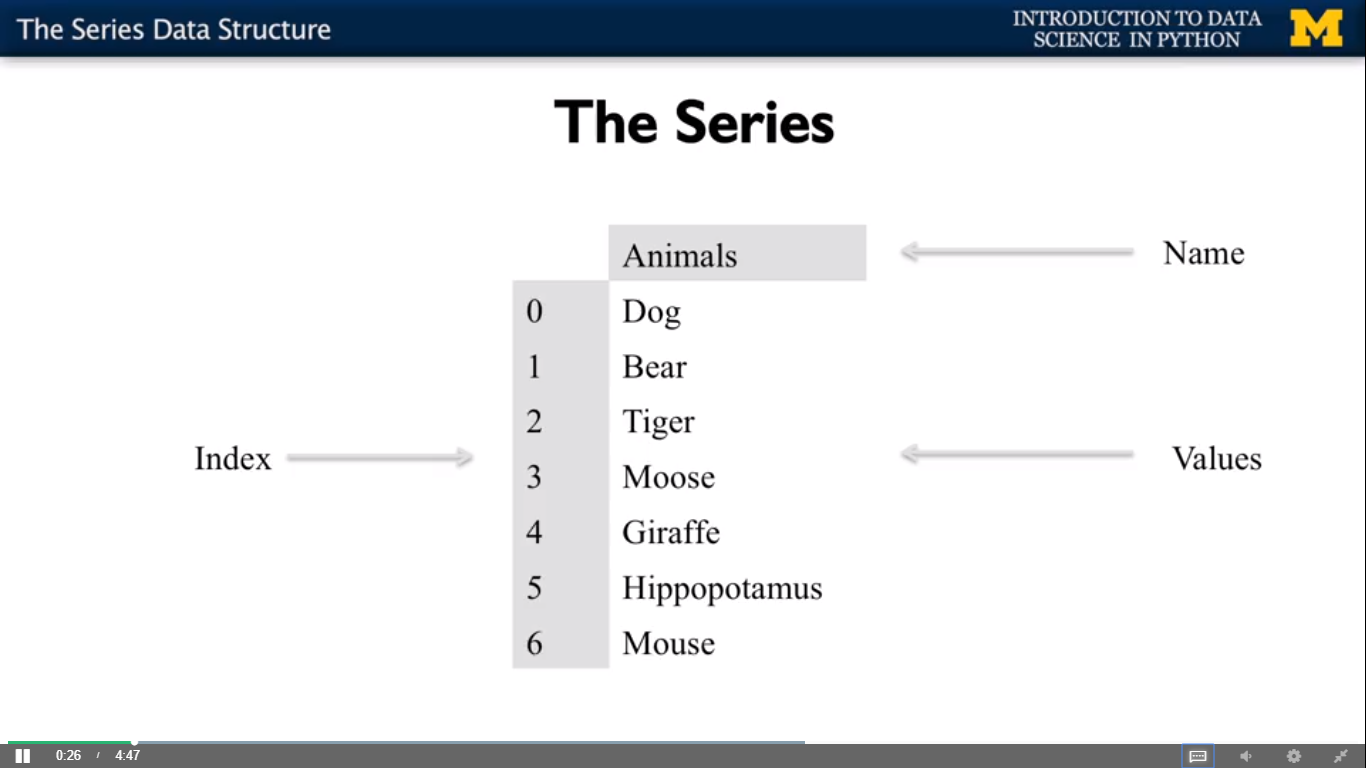

In [22]:
animals=['Tiger','bear','Moose']
pd.Series(animals)

0    Tiger
1     bear
2    Moose
dtype: object

In [24]:
numbers=[1,2,3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [26]:
animals=['Tiger','bear',None]
pd.Series(animals)

0    Tiger
1     bear
2     None
dtype: object

In [28]:
#NAN is a short for None a number
numbers=[1,2,None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [31]:
import numpy as np
np.nan==None

False

In [33]:
np.nan==np.nan

False

* So i need a special function 
#### isnan

In [34]:
np.isnan(np.nan)

True

In [39]:
sports={'Squash':'Egypt',
       'Football':'England',
       'Socer':'USA'}

x=pd.Series(sports)
x

Squash        Egypt
Football    England
Socer           USA
dtype: object

In [44]:
x.index

Index(['Squash', 'Football', 'Socer'], dtype='object')

In [47]:
s=pd.Series(['Sofia','Dimmrta','Olega'],index=['English teacher','Farmer','Dancer'])
s

English teacher      Sofia
Farmer             Dimmrta
Dancer               Olega
dtype: object

A panda.Series can be queried, either by the index position or the index label. As we saw, if you don't give an index to the series, the position and the label are effectively the same values. To query by numeric location, starting at zero, use the iloc attribute. To query by the index label, you can use the loc attribute.

In [49]:
sports={'Squash':'Egypt',
       'Football':'England',
       'Socer':'USA'}

x=pd.Series(sports)
x

Squash        Egypt
Football    England
Socer           USA
dtype: object

In [55]:
#search by index
x.iloc[2]

'USA'

In [58]:
x.loc['Squash']

'Egypt'

In [60]:
x[2]

'USA'

In [62]:
x['Squash']

'Egypt'

In [64]:
v=pd.Series([100,120,130,89,43])

total=0

for item in v:
    total+=item
print(total)

482


In [68]:
import numpy as np
total= np.sum(v)
print(total)

482


In [80]:
s=pd.Series(np.random.randint(0,1000,10000))
s.head()

0    718
1     49
2    920
3    554
4    864
dtype: int32

In [81]:
len(s)

10000

In [82]:
%%timeit -n  100
summary=0
for item in s:
    summary+=item

4.44 ms ± 420 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
%%timeit -n  100
summary=np.sum(s)

1.18 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
s=pd.Series([1,2,3])
s.loc['Animal']='bears'
s

0             1
1             2
2             3
Animal    bears
dtype: object

### The Data Frame Data Strucure 

A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

In [89]:
group1={'Squash':'Egypt',
       'Football':'England',
       'Socer':'USA'}

group2={'Squash':'Tunis',
       'Football':'Spain',
       'Socer':'Suadia Arabia'}
group3={'Squash':'Libanon',
       'Football':'italy',
       'Socer':'France'}

df=pd.DataFrame([group1,group2,group3], index =['group1','group2','group3'])
df

,Football,Socer,Squash
group1,England,USA,Egypt
group2,Spain,Suadia Arabia,Tunis
group3,italy,France,Libanon


In [91]:
df.loc['group2']

Football            Spain
Socer       Suadia Arabia
Squash              Tunis
Name: group2, dtype: object

In [93]:
df.loc['group1','Squash']

'Egypt'

In [95]:
df.T

,group1,group2,group3
Football,England,Spain,italy
Socer,USA,Suadia Arabia,France
Squash,Egypt,Tunis,Libanon


In [101]:
df.loc['group2']

Football            Spain
Socer       Suadia Arabia
Squash              Tunis
Name: group2, dtype: object

In [103]:
df.loc['group2']['Socer']

'Suadia Arabia'

In [104]:
df

,Football,Socer,Squash
group1,England,USA,Egypt
group2,Spain,Suadia Arabia,Tunis
group3,italy,France,Libanon


In [110]:
df.loc[:,['Football','Socer']]

,Football,Socer
group1,England,USA
group2,Spain,Suadia Arabia
group3,italy,France


In [112]:
df

,Football,Socer,Squash
group1,England,USA,Egypt
group2,Spain,Suadia Arabia,Tunis
group3,italy,France,Libanon


In [115]:
df['Voley ball']=None
df

,Football,Socer,Squash,Voley ball
group1,England,USA,Egypt,None
group2,Spain,Suadia Arabia,Tunis,None
group3,italy,France,Libanon,None


#### Data Frame Loading and indexing 

In [119]:
group1={'Egypt':2,
       'Spain':3,
       'Greece':5}

group2={'Egypt':2,
       'Spain':3,
       'Greece':5}


group3={'Egypt':2,
       'Spain':3,
       'Greece':5}



df=pd.DataFrame([group1,group2,group3], index =['group1','group2','group3'])
df

,Egypt,Greece,Spain
group1,2,5,3
group2,2,5,3
group3,2,5,3


In [125]:
# i want to add 3 medals for Egypt so i will write
Egypt=df['Egypt']   #Put it in Variable
Egypt

group1    2
group2    2
group3    2
Name: Egypt, dtype: int64

In [129]:
Egypt +=2
Egypt

group1    10
group2    10
group3    10
Name: Egypt, dtype: int64

In [131]:
df

,Egypt,Greece,Spain
group1,10,5,3
group2,10,5,3
group3,10,5,3


In [134]:
df=pd.read_csv('olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [144]:
df=pd.read_csv('olympics.csv',skiprows=1,index_col=0)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [146]:
df.columns

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [150]:
x=[1,2,3,4]
x

[1, 2, 3, 4]

In [163]:
x[:2] #from 0 to 2 that is refer to index 0 and index 1

[1]

In [164]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]},inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]},inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]},inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'Gold'+col[4:]},inplace=True)
df.head()

,Goldmmer,Gold,Silver,Bronze,Total,Goldnter,Gold.1,Silver.1,Bronze.1,Total.1,Goldmes,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### Querying data Frame

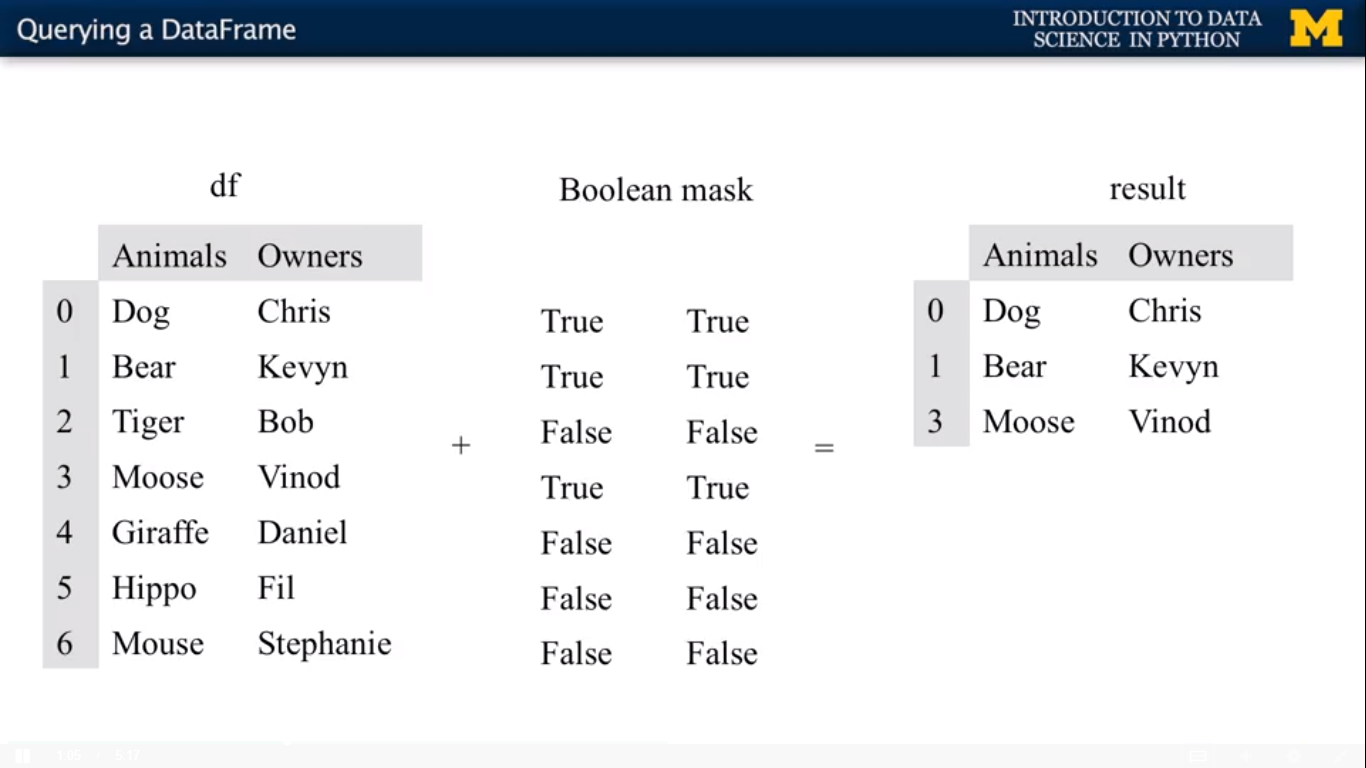

In [166]:
df['Gold']>0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

In [168]:
only_gold=df.where(df['Gold']>0)
only_gold.head()

,Goldmmer,Gold,Silver,Bronze,Total,Goldnter,Gold.1,Silver.1,Bronze.1,Total.1,Goldmes,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


In [170]:
only_gold['Gold'].count()

100

In [172]:
df['Gold'].count()

147

In [175]:
only_gold=only_gold.dropna()
only_gold.head()

,Goldmmer,Gold,Silver,Bronze,Total,Goldnter,Gold.1,Silver.1,Bronze.1,Total.1,Goldmes,Gold.2,Silver.2,Bronze.2,Combined total
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0
Australia (AUS) [AUS] [Z],25.0,139.0,152.0,177.0,468.0,18.0,5.0,3.0,4.0,12.0,43.0,144.0,155.0,181.0,480.0


In [179]:
len(df[(df['Gold']>0) |(df['Gold.1']>0)])

101

In [183]:
df[(df['Gold.1']>0)& (df['Gold']==0)]

,Goldmmer,Gold,Silver,Bronze,Total,Goldnter,Gold.1,Silver.1,Bronze.1,Total.1,Goldmes,Gold.2,Silver.2,Bronze.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9
